# Proyek Klasifikasi Bunga

## Import Library

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import Callback, EarlyStopping

from matplotlib import pyplot as plt

import zipfile
import pickle

2025-04-13 05:40:00.552824: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744522800.759050      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744522800.817086      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Data Preparation

### **Moving Data**

In [2]:
!gdown 1X8AiHCFOJ6B8Qw0LA9mzODqUj1S0u7P_

Downloading...
From (original): https://drive.google.com/uc?id=1X8AiHCFOJ6B8Qw0LA9mzODqUj1S0u7P_
From (redirected): https://drive.google.com/uc?id=1X8AiHCFOJ6B8Qw0LA9mzODqUj1S0u7P_&confirm=t&uuid=c0b11032-dc86-422c-be63-e38d81ce453f
To: /kaggle/working/model-datasets-2.zip
100%|████████████████████████████████████████| 292M/292M [00:03<00:00, 82.5MB/s]


In [3]:
!mkdir model-datasets

In [4]:
zipfile.ZipFile('model-datasets-2.zip', 'r').extractall('model-datasets')

In [5]:
!rm model-datasets-2.zip

### **Data Loading**

In [6]:
train_gen = ImageDataGenerator(
    rescale            = 1/255,
    rotation_range     = 0.15,
    zoom_range         = 0.15,
    shear_range        = 0.15,
    horizontal_flip    = True,
    width_shift_range  = 0.15,
    height_shift_range = 0.15
)

test_gen = ImageDataGenerator(rescale=1/255)

In [7]:
dims = [224, 224]

In [8]:
train_set = train_gen.flow_from_directory(
    directory   = 'model-datasets/train',
    target_size = dims,
    batch_size  = 32,
)

validation_set = test_gen.flow_from_directory(
    directory   = 'model-datasets/validation',
    target_size = dims,
    batch_size  = 32,
)

test_set = test_gen.flow_from_directory(
    directory   = 'model-datasets/test',
    target_size = dims,
    batch_size  = 32,
)

Found 11497 images belonging to 37 classes.
Found 1440 images belonging to 37 classes.
Found 1433 images belonging to 37 classes.


## Modeling

### **Model**

In [9]:
model = models.Sequential([
    layers.Input(shape=(224, 224, 3)),

    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.3),

    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.35),

    layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.4),

    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(37, activation='softmax')
])

I0000 00:00:1744522826.918939      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 224, 224, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 224, 224, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 224, 224, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 112, 112, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 112, 112, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 112, 112, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 56, 56, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 737,605 (2.81 MB)

 Trainable params: 735,173 (2.80 MB)

 Non-trainable params: 2,432 (9.50 KB)

In [11]:
model.compile(
    optimizer = 'adam',
    loss      = 'categorical_crossentropy',
    metrics   = ['accuracy']
)

### **Callbacks**

In [12]:
accuracy_min = 0.92
class CallbackStop(Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('val_accuracy') > accuracy_min:
            print(f'\n✅ Akurasi telah mencapai {accuracy_min}')
            self.model.stop_training = True

callback_stop  = CallbackStop()
early_stopping = EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True, mode='max')

### **Training**

In [13]:
history = model.fit(train_set, epochs=120, callbacks=[callback_stop, early_stopping], validation_data=validation_set)

Epoch 1/120


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1744522839.562597      82 service.cc:148] XLA service 0x7eba1810eb00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1744522839.563405      82 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1744522840.374307      82 cuda_dnn.cc:529] Loaded cuDNN version 90300


  2/360 ━━━━━━━━━━━━━━━━━━━━ 26s 75ms/step - accuracy: 0.0234 - loss: 4.6391   

I0000 00:00:1744522852.820270      82 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


360/360 ━━━━━━━━━━━━━━━━━━━━ 150s 353ms/step - accuracy: 0.1076 - loss: 3.8142 - val_accuracy: 0.1056 - val_loss: 3.5915
Epoch 2/120
360/360 ━━━━━━━━━━━━━━━━━━━━ 120s 326ms/step - accuracy: 0.2286 - loss: 2.9152 - val_accuracy: 0.2958 - val_loss: 2.6997
Epoch 3/120
360/360 ━━━━━━━━━━━━━━━━━━━━ 119s 323ms/step - accuracy: 0.2899 - loss: 2.5850 - val_accuracy: 0.2035 - val_loss: 4.4404
Epoch 4/120
360/360 ━━━━━━━━━━━━━━━━━━━━ 118s 322ms/step - accuracy: 0.3554 - loss: 2.2839 - val_accuracy: 0.1882 - val_loss: 4.4777
Epoch 5/120
360/360 ━━━━━━━━━━━━━━━━━━━━ 119s 325ms/step - accuracy: 0.4096 - loss: 2.0516 - val_accuracy: 0.4563 - val_loss: 2.0208
Epoch 6/120
360/360 ━━━━━━━━━━━━━━━━━━━━ 119s 325ms/step - accuracy: 0.4479 - loss: 1.9018 - val_accuracy: 0.4535 - val_loss: 1.9639
Epoch 7/120
360/360 ━━━━━━━━━━━━━━━━━━━━ 118s 320ms/step - accuracy: 0.4818 - loss: 1.7499 - val_accuracy: 0.4924 - val_loss: 1.8427
Epoch 8/120
360/360 ━━━━━━━━━━━━━━━━━━━━ 119s 324ms/step - accuracy: 0.5272 - los

## Saving

In [14]:
model.save('model.keras')
model.save('model.h5')

In [15]:
with open('history.pkl', 'wb') as file:
    pickle.dump(history.history, file)

## Evaluate

In [16]:
def evaluate(name_set, dataset):
    print(f'\n🔵 {name_set}')
    loss, accuracy = model.evaluate(dataset)
    print('accuracy: ', accuracy)
    print('loss: ', loss)

In [17]:
evaluate('train_set', train_set)


🔵 train_set
360/360 ━━━━━━━━━━━━━━━━━━━━ 115s 321ms/step - accuracy: 0.9620 - loss: 0.1237
accuracy:  0.9597285985946655
loss:  0.12593244016170502


In [18]:
evaluate('validation_set', validation_set)


🔵 validation_set
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.8826 - loss: 0.5272
accuracy:  0.8784722089767456
loss:  0.5430545210838318


In [19]:
evaluate('test_set', test_set)


🔵 test_set
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - accuracy: 0.8535 - loss: 0.6258
accuracy:  0.859734833240509
loss:  0.6268041133880615


## Visualize

In [20]:
def visualize(name):
    plt.figure(figsize=[15, 5])
    plt.plot(history.history[name], label='train', marker='o')
    plt.plot(history.history[f'val_{name}'], label='val', marker='o')

    plt.title(name)
    plt.xlabel('epoch')
    plt.ylabel(name)

    plt.grid()
    plt.legend()
    plt.show()

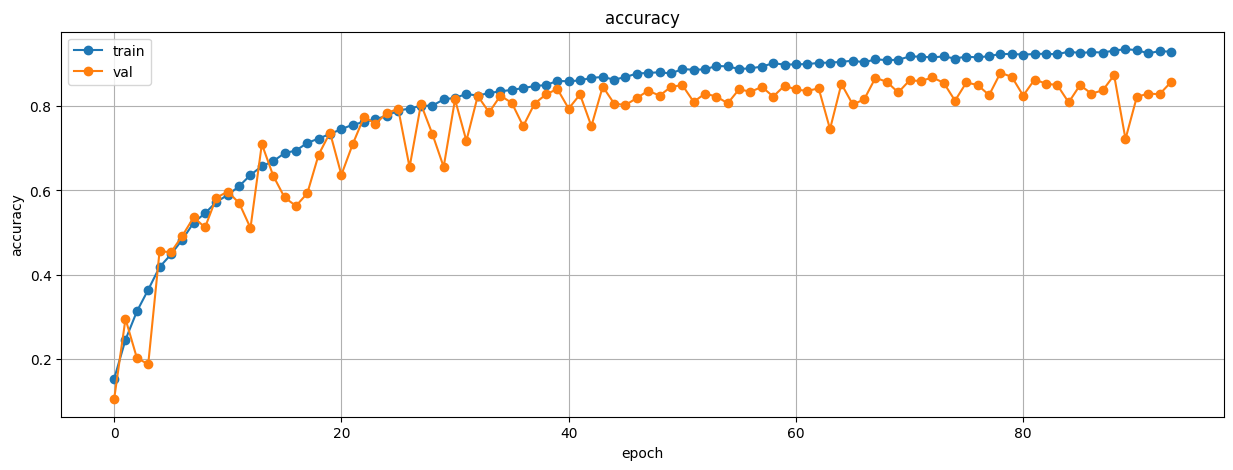

In [21]:
visualize('accuracy')

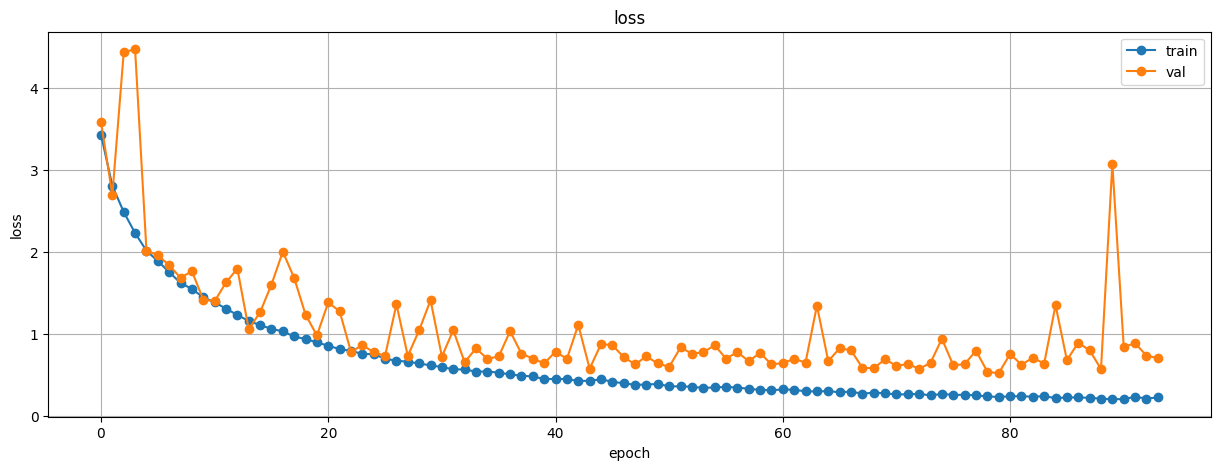

In [22]:
visualize('loss')